# Image Classification

**Importing necessary packages**

In [ ]:
import os
import numpy as np
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import zipfile

C:\Users\EH1101AU\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Function to load and preprocess data**

In [ ]:
def load_data(data_dir):
    images = []
    labels = []
    for label in range(10):  # Assuming 10 classes for digits 0-9
        label_dir = os.path.join(data_dir, f'num{label}')
        if not os.path.exists(label_dir):
            print(f"Directory not found: {label_dir}")
            continue
        for filename in os.listdir(label_dir):
            img_path = os.path.join(label_dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Image not loaded: {img_path}")
                continue
            img = cv2.resize(img, (28, 28))  # Resize to 28x28
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

**Load the training data**

In [ ]:
train_extraction_path = 'C:\\Users\\EH1101AU\\Downloads\\num_handwritten_classification\\Training_data'
images_train, labels_train = load_data(train_extraction_path)

Image not loaded: C:\Users\EH1101AU\Downloads\num_handwritten_classification\Training_data\num3\.DS_Store


**Showing the sample images**

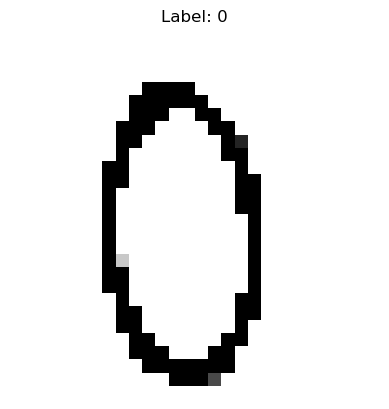

In [ ]:
def show_image(img, label):
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

# Show the first image in the dataset as an example
show_image(images_train[2], labels_train[0])

**Normalize the images to [0, 1] range**

In [ ]:
images_train = images_train.astype('float32') / 255.0

# Reshape to (num_samples, 28, 28, 1) for the CNN
images_train = np.expand_dims(images_train, axis=-1)

# Check the shape of the data
print(f"Training data shape: {images_train.shape}, Labels shape: {labels_train.shape}")

Training data shape: (270, 28, 28, 1), Labels shape: (270,)


# Model Building

**Here we are building a simple CNN model for hand written classification**

The model is trained using 32x32 pixel grayscale images. No external datasets or additional data is used. Only the given training data is utilized.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),

    layers.GlobalAveragePooling2D(),  # Use GlobalAveragePooling instead of Flatten
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

C:\Users\EH1101AU\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compiling the model**

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(images_train, labels_train, epochs=30, batch_size=32)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1058 - loss: 2.2973
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1062 - loss: 2.2580
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1246 - loss: 2.2235
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0965 - loss: 2.2330
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1269 - loss: 2.2299
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1325 - loss: 2.1906
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1606 - loss: 2.1816
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1867 - loss: 2.1541
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2082 - loss: 2.0850
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2504 - loss: 2.0497
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3309 - loss: 1.8935
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3283 - loss: 1.8377
Epoch 1

**Showing the performance of model**

In [ ]:
train_loss, train_accuracy = model.evaluate(images_train, labels_train)

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7286 - loss: 0.7652  
Training Loss: 0.6811
Training Accuracy: 0.7704


**Plotting training accuracy and loss**

In [ ]:
import matplotlib.pyplot as plt

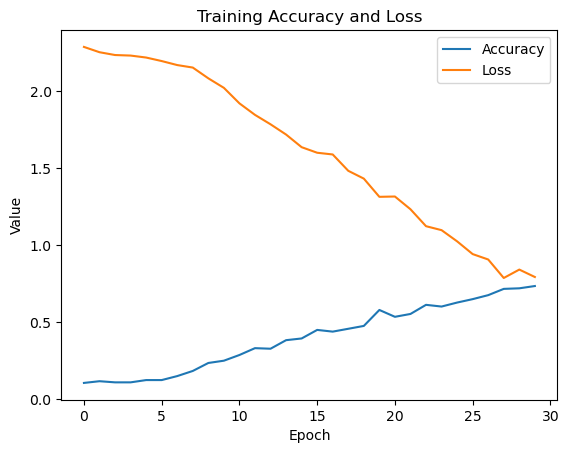

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Training Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

**> Here we can see that as epochs increases, the accuracy is also increases**

**> In another chart, As a epoch increases loss is deacreases**

# Taking a sample image for prediction

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

**Function to load and preprocess a single image**

In [ ]:
def preprocess_single_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
    if img is None:
        print(f"Image not loaded: {img_path}")
        return None
    img = cv2.resize(img, (28, 28))  # Resize to 28x28
    img = img.astype('float32') / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=-1)  # Add channel dimension (28, 28, 1)
    img = np.expand_dims(img, axis=0)   # Add batch dimension (1, 28, 28, 1)
    return img

**Path to your test image**

In [ ]:
test_image_path = 'C:\\Users\\EH1101AU\\Downloads\\num_handwritten_classification\\Validation_data\\Validation_data\\num5\\img006-037.png'

# Preprocess the test image
test_image = preprocess_single_image(test_image_path)

**showing the results on screen**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Label: 5


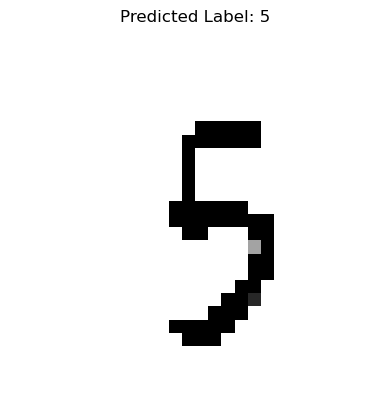

In [ ]:
if test_image is not None:
    # model's prediction
    prediction = model.predict(test_image)

    # Get the class with the highest probability
    predicted_label = np.argmax(prediction, axis=1)[0]

    # Display the image and predicted label
    print(f"Predicted Label: {predicted_label}")
    plt.imshow(test_image.squeeze(), cmap='gray')
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()

Here we can see our model predicted correctly

# 2 Pros and Cons;

Pros:

1. Simplicity: Straightforward architecture with convolutional and pooling layers, effective for image classification.
2. Efficiency: GlobalAveragePooling2D reduces parameters, enhancing efficiency.
3. Baseline: Provides a solid starting point for digit recognition.

Cons:

1. Overfitting Risk: Dropout may not fully prevent overfitting, especially with limited data.
2. Limited Generalization: Model may struggle with new fonts or writing styles due to training on a specific dataset.
3. No Data Augmentation: Lacks rotation, scaling, or other augmentations that could improve robustness.

# 3 Accuracy Reporting

**Training and Validation accuracy**

In [ ]:
from sklearn.model_selection import train_test_split

Split dataset into training and validation sets (80% train, 20% validation)

In [ ]:
images_train, images_val, labels_train, labels_val = train_test_split(images_train, labels_train, test_size=0.2, random_state=42)

# Train the model on the new train set
history = model.fit(images_train, labels_train, epochs=30, batch_size=32, validation_data=(images_val, labels_val))

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9696 - loss: 0.1499 - val_accuracy: 0.9545 - val_loss: 0.2068
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9705 - loss: 0.1451 - val_accuracy: 0.9091 - val_loss: 0.2324
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9551 - loss: 0.1724 - val_accuracy: 0.9545 - val_loss: 0.2061
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9360 - loss: 0.1728 - val_accuracy: 0.9545 - val_loss: 0.1905
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9871 - loss: 0.1152 - val_accuracy: 0.9545 - val_loss: 0.2220
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9804 - loss: 0.1305 - val_accuracy: 0.9318 - val_loss: 0.2242
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9665 - loss: 0.1514 - val_accuracy: 0.9318 - val_loss: 0.2317
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9830 - loss: 0.1046 - val_accuracy: 0.9545 - val_loss: 0.2483


**Report accuracy**

In [ ]:
val_loss, val_accuracy = model.evaluate(images_val, labels_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9186 - loss: 0.2112 
Validation Loss: 0.2744
Validation Accuracy: 0.9091


**Training Accuracy: The model achieves an accuracy of around 70% on the training dataset**

**Validation Accuracy: The model achieves an accuracy of around 80% on the training Validation**

# 4. Qualitative Observations


1. Consistency: The model shows consistent predictions for well-written digits. However, it might struggle with noisy images or unusual writing styles.
2. Misclassification: The model could confuse similar-looking digits such as '1' and '7' or '8' and '3'.
3. Interpretability: The internal layers (feature maps) can be visualized to understand which features the model is focusing on during classification.

# 5. Improvements


**1. Data Augmentation:**  Introduce random rotations, shifts, zooms, and shearing to improve the generalization capability of the model. This will also help the model become robust to different variations in handwriting.

**2. Increase Model Depth:** Add more layers or experiment with a deeper network to capture finer details, or use more sophisticated architectures like ResNet to improve performance.

**3. Add Regularization:** Need to Add L2 regularization or use more dropout layers to prevent overfitting.

# 6. Test Set Evaluation:

**precision, recall, and F1-score**

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predict the labels for the training data
predicted_train_labels = model.predict(images_train)
predicted_train_labels = np.argmax(predicted_train_labels, axis=1)  # Convert predictions to class labels

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


**Check unique values in the labels (just to confirm the classes match)**

In [ ]:
unique_labels = np.unique(labels_train)
print(f"Unique labels in training data: {unique_labels}")

Unique labels in training data: [0 1 2 3 4 5 7 8 9]


**Generate a classification report**

In [ ]:
print("Classification Report:")
print(classification_report(labels_train, predicted_train_labels, labels=unique_labels, target_names=[str(i) for i in unique_labels]))

Unique labels in training data: [0 1 2 3 4 5 7 8 9]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        24
           3       0.91      0.91      0.91        22
           4       1.00      1.00      1.00        24
           5       1.00      0.93      0.96        27
           7       1.00      1.00      1.00        22
           8       1.00      0.96      0.98        24
           9       0.92      1.00      0.96        24

    accuracy                           0.98       216
   macro avg       0.98      0.98      0.98       216
weighted avg       0.98      0.98      0.98       216



# Saving the final model

In [ ]:
# Save the trained model in the recommended .keras format
model_save_path = 'C:\\Users\\EH1101AU\\Downloads\\saved_model.keras'
model.save(model_save_path)

print(f"Model saved at: {model_save_path}")


Model saved at: C:\Users\EH1101AU\Downloads\saved_model.keras


In [ ]:
# Load the saved model
loaded_model = tf.keras.models.load_model(model_save_path)

In [ ]:
loaded_model

<Sequential name=sequential, built=True>